<a href="https://colab.research.google.com/github/kaindoh/Fifa-ranking/blob/master/Fifa_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

Approach 1: Polynomial approach

Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores

 

Approach 2 Logistic approach

To Figure out from the home team’s perspective if the game is a Win, Lose or Draw .

## Metrics of success

On polynomial regression approach the metrics of success are RootMeanSquaredError and r2_score

On Logistic approach metrics of success are f1-score accuracy and confusion matrix

## Importing libaries

In [0]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2,bartlett
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


## Loading rank dataset

In [0]:
# Loading Fifa ranking Dataset
r = pd.read_csv("fifa_ranking.csv")

#Preview the head of dataset
r.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


## Explorative data analysis on Rank Dataset

In [0]:
# Getting the information of the rank dataset

r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [0]:
# Getting the statistical information of the rank dataset

r.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [0]:
# Checking for null values in the rank dataset

r.isnull().sum().any()

False

In [0]:
# Checking for duplicates
r.duplicated().any()

True

In [0]:
# Droping duplicates
r.drop_duplicates(keep ='first',inplace=True)

# Checking for duplicates whether they have actually been dropped
r.duplicated().any()

In [0]:
# Getting the name of the rank datasets columns

r.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
# Getting the number of unique countries in the rank datasets

uniq_country = r.country_full.unique()
len(uniq_country)

216

In [0]:
# Getting the number of unique dates in the rank datasets

uniq_dates = r.rank_date.unique()
len(uniq_dates)

286

## Loading results datasets

In [0]:
# Loading results Dataset

res = pd.read_csv("results.csv")
res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Explorative data analysis on Result Dataset

In [0]:
# Getting the information of the results datasets

res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [0]:
# Getting the statistical information of the results dataset

res.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [0]:
# Checking whether the results dataset has null values

res.isnull().sum().any()

False

In [0]:
# Getting the names of the results columns

res.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [0]:
# Checking the null values in the results column

res.isnull().sum().any()

False

In [0]:
# Checking the unique countries in the results dataset

uniq_country_res = res.country.unique()
len(uniq_country_res)

266

In [0]:
# Checking the unique dates in the results dataset

uniq_date_res = res.date.unique()
len(uniq_date_res)

15115

## Merging the rank and results dataset

In [359]:
# Checking unique dates that are common in both datasets

list1 = []

uniq_dates  = list(uniq_dates)
uniq_date_res = list(uniq_date_res)

for x in uniq_dates:
  if x in uniq_date_res:
    list1.append(x)
print(list1)
print(len(list1))

['1993-08-08', '1993-09-23', '1993-10-22', '1994-03-15', '1994-04-19', '1994-05-17', '1994-09-13', '1994-10-25', '1994-11-22', '1995-04-19', '1995-07-25', '1995-08-22', '1996-01-24', '1996-02-21', '1996-04-24', '1996-08-28', '1996-09-25', '1996-10-23', '1996-11-20', '1996-12-18', '1997-04-09', '1997-06-18', '1997-08-20', '1997-10-17', '1997-11-19', '1997-12-23', '1998-02-18', '1998-03-18', '1998-04-22', '1998-05-20', '1998-07-15', '1998-08-19', '1998-09-16', '1998-10-21', '1998-11-18', '1998-12-23', '1999-01-27', '1999-02-24', '1999-03-24', '1999-05-19', '1999-06-16', '1999-07-21', '1999-08-18', '1999-10-13', '1999-11-17', '1999-12-22', '2000-01-19', '2000-02-16', '2000-03-15', '2000-04-12', '2000-05-10', '2000-06-07', '2000-07-05', '2000-08-09', '2000-10-11', '2000-11-15', '2000-12-20', '2001-01-17', '2001-02-14', '2001-03-14', '2001-04-11', '2001-05-16', '2001-06-20', '2001-07-18', '2001-11-21', '2002-01-16', '2002-02-13', '2002-03-20', '2002-04-17', '2002-05-15', '2002-07-03', '2002

Meaning we are working with dataset as from 1993 to 2018

In [0]:
# Renaming the two columns for easier merging with the results datsets

r.rename(columns = {"country_full":"country","rank_date":"date"},inplace=True)
r.columns

In [0]:
# Merging the datasets using both the dates and country columns

df=pd.merge(r,res,on = ["date","country"])

# Previewing the merged dataset
df.head()
 

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False
1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False
2,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,False
3,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False
4,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False


In [0]:
# Getting the information of the merged datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 23 columns):
rank                       950 non-null int64
country                    950 non-null object
country_abrv               950 non-null object
total_points               950 non-null float64
previous_points            950 non-null int64
rank_change                950 non-null int64
cur_year_avg               950 non-null float64
cur_year_avg_weighted      950 non-null float64
last_year_avg              950 non-null float64
last_year_avg_weighted     950 non-null float64
two_year_ago_avg           950 non-null float64
two_year_ago_weighted      950 non-null float64
three_year_ago_avg         950 non-null float64
three_year_ago_weighted    950 non-null float64
confederation              950 non-null object
date                       950 non-null object
home_team                  950 non-null object
away_team                  950 non-null object
home_score                 950 non-null int

In [0]:
# Getting the statistical information of the merged dataset
df.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_score,away_score
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,64.905263,52.182116,474.214737,-0.116842,26.510495,26.510495,25.184116,12.592032,26.657200,7.997221,25.412653,5.082516,1.657895,1.042105
std,48.075168,190.135933,318.043068,4.420952,97.787086,97.787086,99.671465,49.835482,100.257323,30.077366,94.555624,18.911083,1.918743,1.234521
min,1.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,233.500000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,0.000000,484.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,96.000000,0.000000,662.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,201.000000,1332.160000,1683.000000,30.000000,855.300000,855.300000,1008.940000,504.470000,748.610000,224.580000,640.010000,128.000000,31.000000,12.000000


In [0]:
# checking the rows and columns of the merged datasets

df.shape

(950, 23)

In [0]:
# Getting the names of the columns in the merged dataset

df.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral'],
      dtype='object')

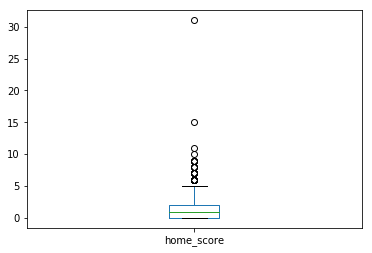

In [0]:
# checking for outlers of homescore

df['home_score'].plot(kind = 'box')

goals past 5 is outliers

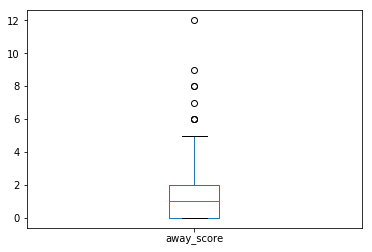

In [0]:
# checking for outlers
df['away_score'].plot(kind = 'box')

Goals past 6 are outliers

I shall preserve the outliers tho ascertain the reason as to why outliers exist



In [0]:
# Dropping unnecesary columns
df.drop(['cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'],axis=1,inplace=True)

## Visualization and Analysis

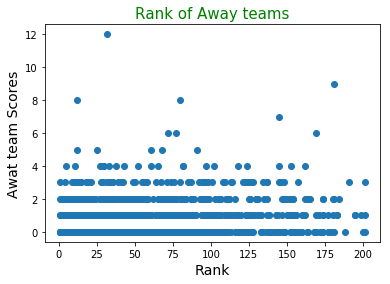

In [369]:
# checking correlation between the rank and away score using  a scatter plot

plt.scatter(df['rank'],df['away_score'])
plt.xlabel("Rank",fontsize=14)
plt.ylabel("Awat team Scores",fontsize=14)
plt.title("Rank of Away teams",fontsize=15,color="green")
plt.show()

There is no evident relationship between rank and away teams

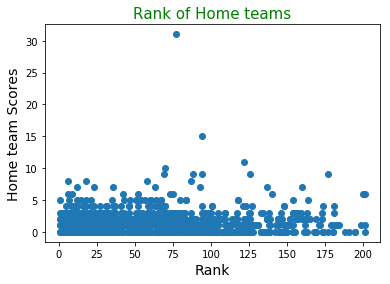

In [370]:
# Checking the relationship between rank and Home teams using a scatter plot

plt.scatter(df['rank'],df['home_score'])
plt.xlabel("Rank",fontsize=14)
plt.ylabel("Home team Scores",fontsize=14)
plt.title("Rank of Home teams",fontsize=15,color="green")
plt.show()

There is no evident relationship between rank and home team

In [0]:
# Checking the tournament in the dataset

print(df.tournament.nunique())
print(df.tournament.unique())

36
['Friendly' 'FIFA World Cup qualification' 'Merdeka Tournament'
 'CFU Caribbean Cup' 'African Cup of Nations'
 'AFC Asian Cup qualification' 'CFU Caribbean Cup qualification'
 'Copa América' 'UEFA Euro qualification'
 'United Arab Emirates Friendship Tournament' 'UNCAF Cup' 'Millennium Cup'
 "King's Cup" 'Windward Islands Tournament' 'Gulf Cup'
 'Cyprus International Tournament' 'Malta International Tournament'
 'Gold Cup qualification' 'UAFA Cup' 'AFF Championship' 'SAFF Cup'
 "Prime Minister's Cup" 'Confederations Cup' 'AFC Asian Cup' 'Nehru Cup'
 'COSAFA Cup' 'CECAFA Cup' 'EAFF Championship'
 'AFC Challenge Cup qualification' 'African Cup of Nations qualification'
 'Copa del Pacífico' 'Viva World Cup' 'Oceania Nations Cup'
 'African Nations Championship' 'CONIFA World Football Cup'
 'Intercontinental Cup']


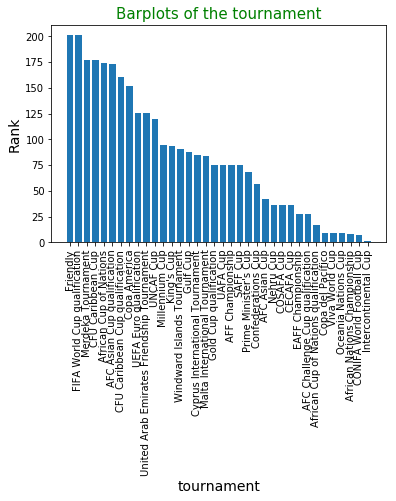

In [372]:
# Plotting the bar plots of rank against the tournament

plt.bar(df['tournament'],df['rank'].sort_values(ascending=False))
plt.xlabel("tournament",fontsize=14)
plt.ylabel("Rank",fontsize=14)
plt.title("Barplots of the tournament",fontsize=15,color="green")
plt.xticks(rotation=90)

plt.show()

In [0]:
# Changing the categorical data fro data type object to category

df[['tournament', 'city','country','home_team', 'away_team','confederation']] = df[['tournament', 'city','country','home_team', 'away_team','confederation']].astype('category')
df.dtypes

rank                          int64
country                    category
country_abrv                 object
total_points                float64
previous_points               int64
rank_change                   int64
cur_year_avg                float64
cur_year_avg_weighted       float64
last_year_avg               float64
last_year_avg_weighted      float64
two_year_ago_avg            float64
two_year_ago_weighted       float64
three_year_ago_avg          float64
three_year_ago_weighted     float64
confederation              category
date                         object
home_team                  category
away_team                  category
home_score                    int64
away_score                    int64
tournament                 category
city                       category
neutral                        bool
dtype: object

In [0]:
# Changing the data type of date from object to datetime

df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [378]:
# Changing categorical variable to integer for easier modelling label encoder

cat = ['tournament', 'city','country','home_team', 'away_team','confederation','neutral','date']
for i in cat:
  
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])
df.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,8,22,BRA,0.0,55,-5,3,0,26,106,1,1,18,201,0
1,35,38,ECU,0.0,23,30,3,0,50,188,5,0,17,291,0
2,50,155,ZIM,0.0,27,4,1,0,188,57,2,0,18,127,0
3,59,19,BOL,0.0,13,28,3,0,23,185,3,1,17,175,0
4,65,56,GUI,0.0,23,-2,1,0,71,154,1,0,18,79,0


In [0]:
# Dropping country abbreviation column

df.drop('country_abrv',inplace=True,axis=1)
df.head()

## Modelling

### Approach 1

#### Model 1

#### Predict how many goals the home team scores

In [0]:
# Splitting the dataset into feature and target sets of home team

Xh =df[['rank', 'home_team', 'away_team', 'away_score','tournament']]
yh = df['home_score']

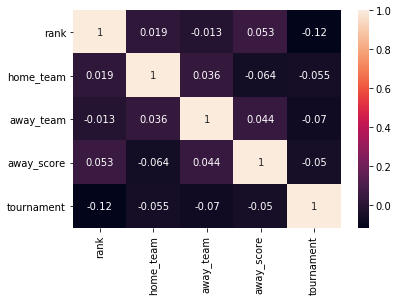

In [381]:
# Finding the correlation of the independent variable

corrh = Xh.corr()

# showing correlation on a heatmap
sns.heatmap(corrh,annot=True)
plt.show()

There is no tangible correlation between the independent variables

##### Checking for Mutlicollinearity

In [383]:
# Checking for multicollinearity

mult = pd.DataFrame(np.linalg.inv(corrh.values) ,index = corrh.index ,columns = corrh.columns)
mult

,rank,home_team,away_team,away_score,tournament
rank,1.017267,-0.016548,0.024445,-0.049796,0.118575
home_team,-0.016548,1.008991,-0.035276,0.069412,0.054555
away_team,0.024445,-0.035276,1.008414,-0.043990,0.069840
away_score,-0.049796,0.069412,-0.043990,1.011199,0.045063
tournament,0.118575,0.054555,0.069840,0.045063,1.024180


There is no multicollinearity between the varibales

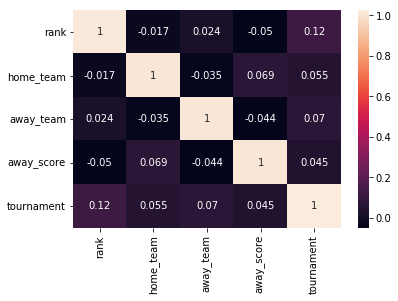

In [384]:
# Showing that there is no multicollinearity on a heatmap

sns.heatmap(mult,annot=True)

In [390]:
# Using linear regression to fit and predict the model
lr = LinearRegression()
lr.fit(xh_train,yh_train)

yh_pred = lr.predict(xh_test)

#showing the predicted and the actual con currently
comp = pd.DataFrame({"Actual":yh_test,"Predicted":yh_pred})

# Showing the RMSE of the linear model
print("RMSE is : ",np.sqrt(mean_squared_error(yh_test,yh_pred)))
print("r2_score is : ",r2_score(yh_test,yh_pred))
print(comp.describe())

RMSE is :  1.5627058121209585
r2_score is :  0.004550701391784595
           Actual   Predicted
count  190.000000  190.000000
mean     1.668421    1.664269
std      1.570412    0.340596
min      0.000000    0.168722
25%      1.000000    1.447323
50%      1.000000    1.718169
75%      2.000000    1.900654
max      9.000000    2.463041


The RMSE of 1.56 which is higher than 10% of mean which is 0.166,hence it is not the perfect model

In [391]:
# Using polynomial regresion to fit and predict the model at degree 2
pf =PolynomialFeatures(degree=2)
xtr_poly = pf.fit_transform(xh_train)
xtst_poly = pf.fit_transform(xh_test)

lr = LinearRegression()
lr.fit(xtr_poly,yh_train)

yhp_pred = lr.predict(xtst_poly)

#metrics of success
print("RMSE : ",np.sqrt(mean_squared_error(yh_test,yhp_pred)))
print("r2_score is : ",r2_score(yh_test,yhp_pred))
comp = pd.DataFrame({"Actual":yh_test,"Predicted":yhp_pred}).head(25)
print(comp.describe())

RMSE :  1.5743520063595384
r2_score is :  -0.01034192321012406
          Actual  Predicted
count  25.000000  25.000000
mean    1.600000   1.735659
std     1.443376   0.512849
min     0.000000   0.815903
25%     0.000000   1.372126
50%     1.000000   1.682435
75%     2.000000   2.139547
max     5.000000   3.278374


The RMSE of 1.57 which is higher than 10% of mean which is 0.16,hence it is not the perfect model as well but its not so far so it can still be used for modelling

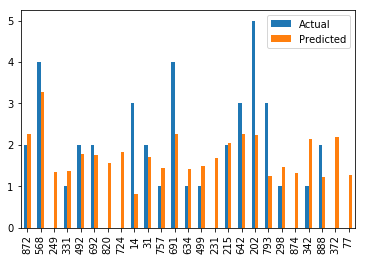

In [0]:
# Bar plot visualizing the actual data predicted data

comp.plot(kind='bar')

The actaul and the predicted are somewhat correlated

##### Bartlets test

In [0]:
# Lets create the residual between the actual and te predicted
residuals = np.subtract(yhp_pred, yh_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

# The mean of the residuals
residuals.mean()

-0.02466879824341311

It is slightly over estimating chances by, on average, 2.4%

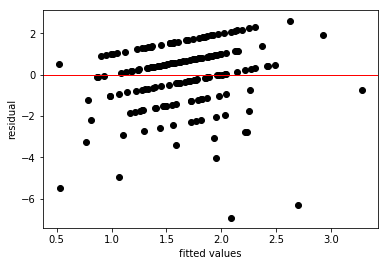

In [392]:
#Scatter plot between the actual and the predicted variables

plt.scatter(yhp_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The somehow have an increasing relationship between the residual and the fitted values

#### Model 2

#### Predict how many goals the away team scores

In [0]:
# Splitting the dataset into feature and target sets of away  team

Xa =df[['rank','home_team', 'away_team', 'home_score','tournament']]
ya = df['away_score']

##### Checking for multicollinearity

In [404]:
# Checking for multicollinearity
corra =Xa.corr()
multa = pd.DataFrame(np.linalg.inv(corra.values) ,index = corra.index ,columns = corra.columns)
multa

,rank,home_team,away_team,home_score,tournament
rank,1.015485,-0.013021,0.024572,0.026039,0.122624
home_team,-0.013021,1.004244,-0.031884,0.004235,0.051760
away_team,0.024572,-0.031884,1.014344,0.089102,0.078062
home_score,0.026039,0.004235,0.089102,1.012153,0.071133
tournament,0.122624,0.051760,0.078062,0.071133,1.027170


There is no multicollinearity in the away team

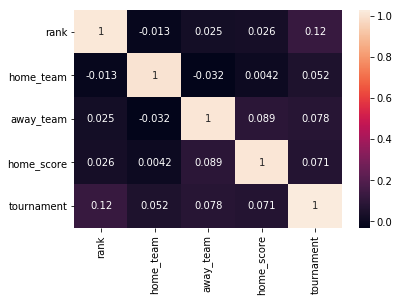

In [403]:
# Showing that there is no multicollinearity on a heatmap

sns.heatmap(multa,annot=True)
plt.show()

In [0]:
#splitting the train set and test set

xa_train,xa_test,ya_train,ya_test = train_test_split(Xa,ya,test_size = 0.2,random_state =0)

In [395]:
# Predicting the model using linear regression
lr = LinearRegression()
lr.fit(xa_train,ya_train)

ya_pred = lr.predict(xa_test)
# Metrics of success
print("RMSE : ",np.sqrt(mean_squared_error(ya_test,ya_pred)))
comp = pd.DataFrame({"Actual":ya_test,"Predicted":ya_pred})
print(comp.describe())



RMSE :  1.153567685316895
           Actual   Predicted
count  190.000000  190.000000
mean     1.047368    1.051225
std      1.156014    0.196042
min      0.000000    0.411662
25%      0.000000    0.926923
50%      1.000000    1.046234
75%      2.000000    1.178495
max      7.000000    1.680917


The Rmse score of 1.15  is bigger than 10% of mean which is 0.104,hence its not very good

In [397]:
# using polynomial regrresion to fit and predict the model
pf =PolynomialFeatures(degree=2)
xtr_poly = pf.fit_transform(xa_train)
xtst_poly = pf.fit_transform(xa_test)

lr = LinearRegression()
lr.fit(xtr_poly,ya_train)

yap_pred = lr.predict(xtst_poly)
#metrics of success
print(np.sqrt(mean_squared_error(ya_test,yap_pred)))
comp = pd.DataFrame({"Actual":ya_test,"Predicted":yap_pred}).head(20)
print(comp.describe())


1.1941803582571737
          Actual  Predicted
count  20.000000  20.000000
mean    1.000000   0.903021
std     1.025978   0.283668
min     0.000000   0.396146
25%     0.000000   0.817905
50%     1.000000   0.907949
75%     1.000000   1.037911
max     4.000000   1.425080


The Rmse score of 1.15  is bigger than 10% of mean which is 0.1,hence its not very good but can still be used for prediction because its not so far

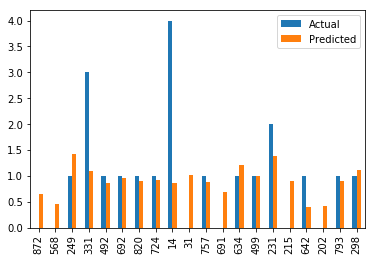

In [0]:
comp.plot(kind='bar')

##### Bartlets Test

In [0]:
# Checking for residuals
residuals = np.subtract(yap_pred, ya_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

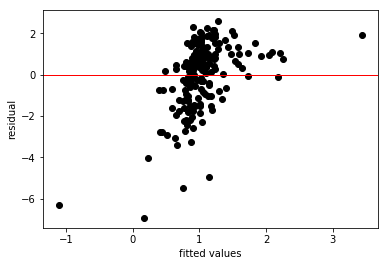

In [0]:
# Plotting the residuals against the fiited using a satter plot

plt.scatter(yap_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

### Approach 2 Logistic approach

In [0]:
# Creating the difference between the home scores and away scores inorder to identify whether it is awin a lose or adraw
df['diff'] = df['home_score'] - df['away_score']
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,diff
0,8,22,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,26,106,1,1,18,201,0,0
1,35,38,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,50,188,5,0,17,291,0,5
2,50,155,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,188,57,2,0,18,127,0,2
3,59,19,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,23,185,3,1,17,175,0,2
4,65,56,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,71,154,1,0,18,79,0,1


In [0]:
# Seeing the mapping difference on the difference column
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,diff
0,8,22,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,26,106,1,1,18,201,0,0
1,35,38,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,50,188,5,0,17,291,0,5
2,50,155,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,188,57,2,0,18,127,0,2
3,59,19,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,23,185,3,1,17,175,0,2
4,65,56,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,71,154,1,0,18,79,0,1


In [0]:
def convert(goals):
  if goals > 0:
    return 'Win' # The positive differnce is a win
  elif goals < 0:
    return 'Lose' # The negative differnce is a lose
  else:
    return 'Draw' # The 0 differnce is a draw

df['diff'] = df['diff'].apply(lambda x: convert(x))
df.head()

,rank,country,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,neutral,diff
0,8,22,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,26,106,1,1,18,201,0,Draw
1,35,38,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,50,188,5,0,17,291,0,Win
2,50,155,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,188,57,2,0,18,127,0,Win
3,59,19,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,23,185,3,1,17,175,0,Win
4,65,56,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,71,154,1,0,18,79,0,Win


In [0]:
# Renaming the difference column to a status column
df.rename(columns ={'diff':'status'},inplace=True)
df.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'status'],
      dtype='object')

Text(0.5, 1.0, 'Countplot of Status')

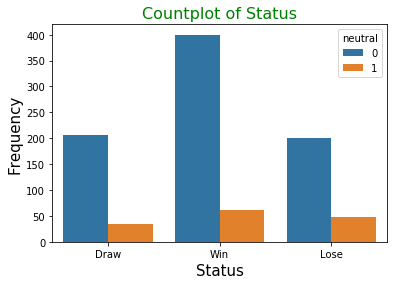

In [0]:
# visualizing the win draw and lose on a bar plot
sns.countplot('status',data=df)
plt.xlabel("Status",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Countplot of Status",fontsize=16,color="green")

In [0]:
# splitting the data into feature set and a target set
X =df[['rank', 'country', 'total_points', 'previous_points', 'rank_change', 'confederation',
       'date', 'home_team', 'away_team', 
       'tournament', 'city', 'neutral']]
y = df['status']

##### Checking for mutlicollinearity

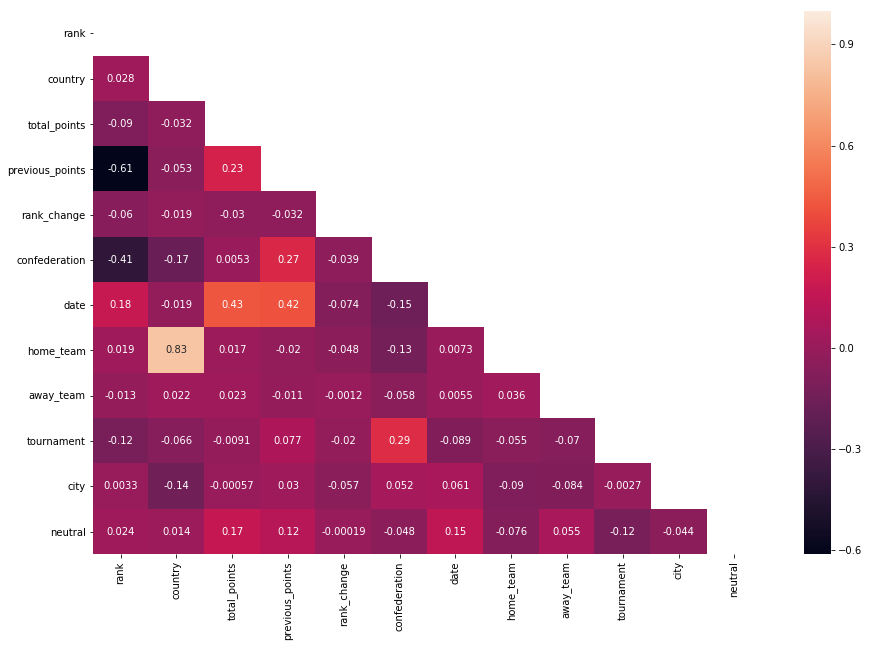

In [406]:

# Correlation heatmap of the numerical variables 
corr  =X.corr()

plt.figure(figsize = (15,10))
heatmap = np.zeros_like(X.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(X.corr(), annot=True, mask=heatmap)
plt.show()

There is no much collinearity

In [0]:
# checking for multicollinearity
pd.DataFrame(np.linalg.inv(corr.values) ,index = corr.index ,columns = corr.columns)

,rank,country,total_points,previous_points,rank_change,confederation,date,home_team,away_team,tournament,city,neutral
rank,2.764558,0.200990,0.427592,2.154724,0.149009,0.353250,-1.480213,-0.137415,0.086212,-0.074329,0.024355,-0.181795
country,0.200990,3.484009,0.204551,0.197499,-0.032506,0.222527,-0.056243,-2.884282,0.072320,-0.017899,0.220558,-0.310920
total_points,0.427592,0.204551,1.335793,0.301984,0.014605,-0.020392,-0.752918,-0.203764,-0.005165,-0.041323,0.040976,-0.187336
previous_points,2.154724,0.197499,0.301984,3.095338,0.091320,-0.200396,-1.793304,-0.180136,0.064965,-0.101355,0.034283,-0.240770
rank_change,0.149009,-0.032506,0.014605,0.091320,1.023473,0.078329,0.014045,0.090381,0.011494,0.013058,0.054050,-0.004066
confederation,0.353250,0.222527,-0.020392,-0.200396,0.078329,1.357954,0.223302,-0.035477,0.051919,-0.293007,-0.041855,0.006492
date,-1.480213,-0.056243,-0.752918,-1.793304,0.014045,0.223302,2.374022,0.065851,-0.026988,0.108100,-0.101079,0.052351
home_team,-0.137415,-2.884282,-0.203764,-0.180136,0.090381,-0.035477,0.065851,3.428464,-0.082940,0.047192,-0.091557,0.357553
away_team,0.086212,0.072320,-0.005165,0.064965,0.011494,0.051919,-0.026988,-0.082940,1.020396,0.053965,0.083795,-0.056018
tournament,-0.074329,-0.017899,-0.041323,-0.101355,0.013058,-0.293007,0.108100,0.047192,0.053965,1.111866,0.027074,0.122201


In [0]:
# Testing my model with several classiffiers to see the better classifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Several list of classifiers
classifier = []
classifier.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('RF', RandomForestClassifier()))
classifier.append(('NB', GaussianNB()))
classifier.append(('SVM', SVC(gamma='auto')))

results = []
names = []
# Implementing cross valiadtaion
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.486842 (0.047441)
RF: 0.443421 (0.057895)
NB: 0.301316 (0.038676)
SVM: 0.481579 (0.033131)


We can see that logistic reggresion has the highest accuracy hence we use it for classification modelling

##### Hyperparameter Tuning

In [0]:
# Here we want to fine tune our logistic regresion using Random Search:
# Here are some the parameters
param ={'multi_class' : ['ovr','auto'],
        'penalty' : ['l1','l2'],
        'C' : np.logspace(0, 4, 10)
       }
lr = LogisticRegression(

clf = RandomizedSearchCV(lr, param, cv=5, verbose=0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
    
# Perfomance metrics
print(clf.best_params_)
print(clf.best_score_)

{'penalty': 'l1', 'multi_class': 'ovr', 'C': 21.544346900318832}
0.49605263157894736


In [407]:
# Getting the Actual and predicted

diff = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
diff.head()

,Actual,Predicted
872,Win,Win
568,Win,Win
249,Lose,Lose
331,Lose,Win
492,Win,Win


In [0]:
# Perfomance metrics
print("Classification Report")
print(classification_report(y_test,y_pred))
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("Accuracy",accuracy_score(y_test,y_pred))



Classification Report
              precision    recall  f1-score   support

        Draw       0.33      0.02      0.04        46
        Lose       0.32      0.12      0.18        48
         Win       0.51      0.90      0.65        96

    accuracy                           0.49       190
   macro avg       0.39      0.35      0.29       190
weighted avg       0.42      0.49      0.38       190

Confusion matrix
[[ 1  4 41]
 [ 1  6 41]
 [ 1  9 86]]
Accuracy 0.48947368421052634


We have accuracy of 49% which was pretty low 




## Challenging the solution

The accuracy was low for all models used hence an indication that the data was not enough for the research question

Extra features that have more weight on the goals scored byhome teams would have greatly improved the accuracy of the model
